<a href="https://colab.research.google.com/github/nickkolev97/Tip_deconvolution_hack/blob/main/1_afm_imperfect_probe_colab_hackathon_nick.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AFM Digital Twin: Imperfect Probe Example

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/pycroscopy/DTMicroscope/blob/main/notebooks/AFM/1_AFM_Imperfect_Probe_COLAB_Hackaton.ipynb)


## Task Overview

Participants are invited to develop methods for recovering the **"true" image** from SPM scans affected by probe artifacts, such as variable probe sizes and double tips.

---

### **Key Question**

> **Given a corrupted SPM image affected by probe artifacts, can we automatically detect these distortions and accurately reconstruct the original, undistorted image?**


# 1. Run server

In [ ]:
!pip install pyro5
!pip install scifireaders
!pip install sidpy
!pip install pynsid
!pip install git+https://github.com/pycroscopy/DTMicroscope.git

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.2/84.2 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.4/102.4 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 35.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.9/69.9 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 52.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.3/516.3 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.6 MB/s eta 0:00:00
  Attempting uninstall: dask
    Found existing installation: da

In [ ]:
!run_server_afm

You don't have igor2 installed.     If you wish to open igor files, you will need to install it     (pip install igor2) before attempting.
You don't have gwyfile installed.     If you wish to open .gwy files, you will need to      install it (pip install gwyfile) before attempting.
Server started and running in the background. Logs are being written to server.log.


# 2. Client side

In [ ]:
import matplotlib.pylab as plt
import numpy as np
import Pyro5.api
from IPython.display import clear_output, display

## 2.1 Get data

In [ ]:
!wget https://github.com/pycroscopy/DTMicroscope/raw/boris_dev/DTMicroscope/test/datasets/dset_spm1.h5

--2024-12-16 20:14:03--  https://github.com/pycroscopy/DTMicroscope/raw/boris_dev/DTMicroscope/test/datasets/dset_spm1.h5
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/pycroscopy/DTMicroscope/boris_dev/DTMicroscope/test/datasets/dset_spm1.h5 [following]
--2024-12-16 20:14:04--  https://raw.githubusercontent.com/pycroscopy/DTMicroscope/boris_dev/DTMicroscope/test/datasets/dset_spm1.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22317256 (21M) [application/octet-stream]
Saving to: ‘dset_spm1.h5’

dset_spm1.h5        100%[===================>]  21.28M  --.-KB/s    in 0.05s   

2024-12-16 

## 2.2 Register Data to the Digital twin

In [ ]:
uri = "PYRO:microscope.server@localhost:9092" #port for the AFM DT 9092
mic_server = Pyro5.api.Proxy(uri)
import sys

if 'google.colab' in sys.modules:
    mic_server.initialize_microscope("STM", data_path = r"stm_datasets.h5" )#r"dset_spm1.h5")
else:
    mic_server.initialize_microscope("STM", data_path = "../test/datasets/dset_spm1.h5")
mic_server.setup_microscope(data_source = 'Compound_Dataset_1')#upload dataset?
mic_server.get_dataset_info()

AttributeError: 'MicroscopeServer' object has no attribute 'microscope'

In [ ]:
uri = "PYRO:microscope.server@localhost:9092" #port for the AFM DT 9092
mic_server = Pyro5.api.Proxy(uri)
import sys

if 'google.colab' in sys.modules:
    mic_server.initialize_microscope("AFM", data_path = r"dset_spm1.h5" )#r"dset_spm1.h5")
else:
    mic_server.initialize_microscope("AFM", data_path = "../test/datasets/dset_spm1.h5")
mic_server.setup_microscope(data_source = 'Compound_Dataset_1')#upload dataset?
mic_server.get_dataset_info()

[('channels',
  ['Channel_000',
   'Channel_001',
   'Channel_002',
   'Channel_003',
   'Channel_004',
   'Channel_005',
   'Channel_006']),
 ('signals',
  ['HeightRetrace',
   'Amplitude1Retrace',
   'Amplitude2Retrace',
   'Phase1Retrace',
   'Phase2Retrace',
   'FrequencyRetrace',
   'Response']),
 ('units', ['m', 'm', 'm', 'deg', 'deg', 'm', 'a.u.']),
 ('scans', [0, 1, 2, 3, 4, 5]),
 ('spectra', []),
 ('point_clouds', [6])]

## Artefact 0: Blunt 'needle' with an offset tip

(256, 256)


NameError: name 'dat1' is not defined

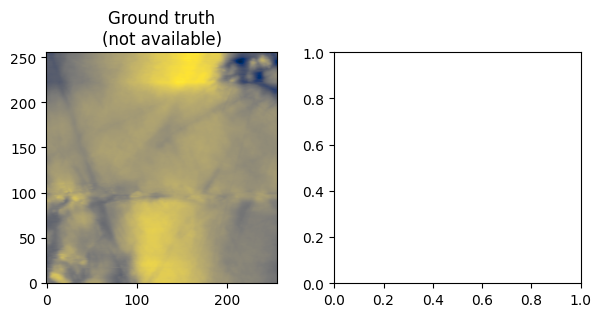

In [ ]:
for i in range(2):
  #scan without modification
  array_list, shape, dtype  =  mic_server.get_scan(channels=['HeightRetrace'], modification=None)
  dat0 =  np.array(array_list, dtype=dtype).reshape(shape)
  #array_list, shape, dtype = mic_server.get_scan(channels=['HeightRetrace',], modification=mod_dict)
  #dat1 = np.array(array_list, dtype=dtype).reshape(shape)
  print(dat0[0].T.shape)

  fig, ax = plt.subplots(1, 2, figsize=(7,3))

  ax[0].imshow(dat0[0].T, cmap='cividis', origin='lower')
  ax[0].set_title('Ground truth\n(not available)')
  ax[1].imshow(dat1[0].T, cmap='cividis', origin='lower')
  ax[1].set_title('Corrupted image')
  plt.show()

Generating Test Data

In [ ]:
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import Dataset, DataLoader, Subset, RandomSampler
import torch.optim as optim
import torchvision.transforms.functional as F
import torchvision.transforms as transforms
import os
import random
from scipy.ndimage import gaussian_filter, median_filter
from matplotlib import pyplot as plt
from tqdm import tqdm

from pathlib import Path

In [ ]:
# Custom transformation for random rotation
class RandomRotation_(object):
    '''
    Randomly rotates the image by an angle chosen from a list of angles.
    '''
    def __init__(self, angles):
        self.angles = angles

    def __call__(self, img):
        img.transpose(0,1)
        angle = random.choice(self.angles)
        img_ =  F.rotate(img, angle)
        img_.transpose(0,1)
        return img_


In [ ]:
class AFM_double_tip_dataset(Dataset):
    def __init__(self, length = 1500):
        '''
        NOTE: Since the dataset provided only has one ground truth, I will only have one image in the images folder.
              If using in a pipeline for training, this should be changed!
        Args:
            length (int): size of dataset you want to generate
        '''
        self.length = length

        # Get the original scans
        array_list, shape, dtype = mic_server.get_scan(channels=['HeightRetrace'], modification=None)
        self.images = [torch.tensor(array_list).float()]
        # max/min normalise now, rather than at every __getitem__()


        # list of transforms to apply to both original image and corrupted
        self.transforms_both = transforms.Compose([
            RandomRotation_([0, 90, 180, 270])
            ])

    def __len__(self):
        return self.length

    def __getitem__(self, idx):
        # get the corrupted scan
        # do (blunt) double tip with 50% chance, rest of time do blunt tip only

        if np.random.rand() > 0.5:
            # double tip
            r_tip = np.random.uniform(0.2, 0.8, (2,)).tolist()  # Radius of the blunt tip
            center = np.random.uniform(0.2, 0.8, (2,2)).tolist()  # Tips location
            length_coefs = np.random.uniform(0.2, 1, (2,)).tolist()

            kwargs = {'r_tip': r_tip, 'center': center, 'length_coef': length_coefs}
            mod_dict = [{'effect': 'tip_doubling', 'kwargs': kwargs},]
        else:
            # just blunt
            r_tip = np.random.uniform(0.2, 0.8)  # Radius of the blunt tip
            center = [np.random.uniform(0.2, 0.8), np.random.uniform(0.2, 0.8)]  # Tip location

            kwargs = {'effect': 'real_tip', 'r_tip': r_tip, 'center': center}
            mod_dict = [{'effect': 'real_tip', 'kwargs': kwargs}]


        array_list, shape, dtype = mic_server.get_scan(channels=['HeightRetrace'], modification=mod_dict)
        corrupted = torch.tensor(array_list).float()

        # max/min normalization
        corrupted = (corrupted-torch.min(corrupted))/(torch.max(corrupted)-torch.min(corrupted))

        # get true image
        image = self.images[0]

        # stack them so they can be rotated together
        both = torch.stack([image, corrupted])
        # transforms_both returns the original image (in first channel), and the double tip image in zeroth channel
        both = self.transforms_both(both)

        # We crop it to increase dataset size
       # image = transforms.RandomCrop(128)(image)

        # The "label" is the original image, the "image" is the image with the double tip
        label = both[0,:,:]
        corrupted = both[1,:,:]


        # max/min normalization
        corrupted = (corrupted-torch.min(corrupted))/(torch.max(corrupted)-torch.min(corrupted))
        label = (label-torch.min(label))/(torch.max(label)-torch.min(label))

        return corrupted.float(), label.float()


In [ ]:
dataset_train = AFM_double_tip_dataset(length=500)#
dataset_test = AFM_double_tip_dataset(length=50)

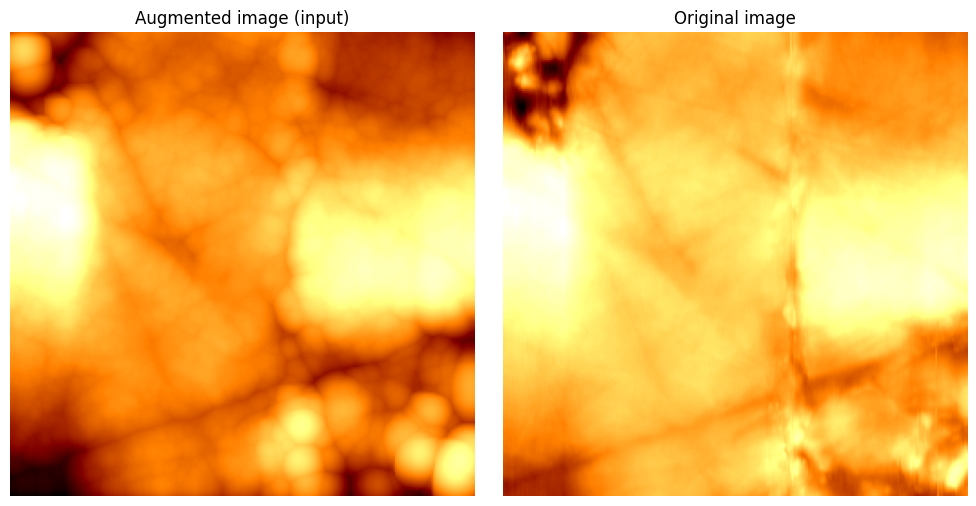

In [ ]:
# plot 10 images
for i in range(1):
  imgs = dataset_train[i]
  img1 = imgs[0].numpy()[0,:,:]
  img2 = imgs[1].numpy()[0,:,:]
  fig, axes = plt.subplots(1, 2, figsize=(10, 5))
  # Display the first image
  axes[0].imshow(img1, cmap='afmhot')
  axes[0].axis('off')  # Hide axes
  axes[0].set_title('Augmented image (input)')

  # Display the second image
  axes[1].imshow(img2, cmap='afmhot')
  axes[1].axis('off')
  axes[1].set_title('Original image')

  # Adjust layout
  plt.tight_layout()

  # Show the plot
  plt.show()

In [ ]:
# create dataloaders and samplers (we want to sample without replacement)
batchSize = 32
sampler_train = RandomSampler(dataset_train, replacement=False)
sampler_test = RandomSampler(dataset_test, replacement=False)
data_loaders_train = DataLoader(dataset_train, sampler=sampler_train, batch_size=batchSize)
data_loaders_test = DataLoader(dataset_test, sampler=sampler_test, batch_size=batchSize)

In [ ]:
from skimage.metrics import structural_similarity as ssim

def combined_loss(y_true, y_pred):
    ssim_loss = 1 - tf.reduce_mean(tf.image.ssim(y_true, y_pred, max_val=1.0))
    mse_loss = tf.reduce_mean(tf.square(y_true - y_pred))
    return 0.6 * mse_loss + 0.4 * ssim_loss  # Weighted combination



In [ ]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()

        # Encoder
        self.encoder = nn.Sequential(nn.Conv2d(1,32, kernel_size=3, padding='same'),
                                     nn.ReLU(inplace=True),
                                     nn.BatchNorm2d(32),
                                     nn.Conv2d(32,32, kernel_size=3, padding='same'),
                                     nn.ReLU(inplace=True),
                                     nn.BatchNorm2d(32),
                                     nn.Conv2d(32,64, kernel_size=3, padding='same'),
                                     nn.ReLU(inplace=True),
                                     nn.BatchNorm2d(64),
                                     nn.Conv2d(64,64, kernel_size=3, padding='same'),
                                     nn.ReLU(inplace=True),
                                     nn.BatchNorm2d(64),
                                     nn.MaxPool2d(2,2)
        )

        # Bottleneck
        self.bottleneck = nn.Sequential(nn.Conv2d(64,128, kernel_size=3, padding='same'),
                                         nn.ReLU(inplace=True),
                                         nn.BatchNorm2d(128),
                                         nn.Conv2d(128,128, kernel_size=3, padding='same'),
                                         nn.ReLU(inplace=True),
                                         nn.BatchNorm2d(128),
        )

        self.decoder = nn.Sequential(nn.Upsample(scale_factor=2, mode='bilinear'),
                                     nn.Conv2d(128, 64, kernel_size=3, padding='same'),
                                     nn.ReLU(inplace=True),
                                     nn.BatchNorm2d(64),
                                     nn.Conv2d(64, 64, kernel_size=3, padding='same'),
                                     nn.ReLU(inplace=True),
                                     nn.BatchNorm2d(64),
                                     nn.Conv2d(64, 32, kernel_size=3, padding='same'),
                                     nn.ReLU(inplace=True),
                                     nn.BatchNorm2d(32),
                                     nn.Conv2d(32, 32, kernel_size=3, padding='same'),
                                     nn.ReLU(inplace=True),
                                     nn.BatchNorm2d(32),
                                     nn.Conv2d(32, 1, kernel_size=1),
                                     nn.Tanh()
        )

    def forward(self, x):
        # Encoding path
        enc = self.encoder(x)

        # Bottleneck
        bottleneck = self.bottleneck(enc)

        # Decoding path
        out = self.decoder(bottleneck)

        return out

In [ ]:
def train_autoencoder(model, dataloader_train, dataloader_test, loss_fn, optimizer, scheduler,
                      patience, num_epochs, model_name, device="cuda", diff=False):
    """
    Train an autoencoder model and save the best-performing version based on validation loss.

    Args:
        model (torch.nn.Module): The autoencoder model to train.
        dataloader_train (DataLoader): DataLoader for training data.
        dataloader_test (DataLoader): DataLoader for validation data.
        loss_fn (torch.nn.Module): Loss function (e.g., MSELoss).
        optimizer (torch.optim.Optimizer): Optimizer for model parameters.
        scheduler (torch.optim.lr_scheduler): Learning rate scheduler.
        patience (int): Number of epochs to wait for improvement in validation loss.
        num_epochs (int): Number of epochs to train.
        model_name (str): Path to save the best model.
        device (str): Device to use for training (e.g., "cuda" or "cpu").
        diff (Bool): If true, the model predicts noise/double tip, not the final image

    Returns:
        dict: Training history containing train and validation loss per epoch.
    """
    # Move model to device
    model = model.to(device)
    best_loss = float("inf")  # Track best validation loss
    history = {"train_loss": [], "val_loss": []}
    early_stopping = 0

    for epoch in range(num_epochs):
        print(f"Epoch {epoch + 1}/{num_epochs}")
        print("-" * 50)

        # Training phase
        model.train()
        train_loss = 0.0

        # Wrap the dataloader with tqdm for progress bar
        progress_bar = tqdm(dataloader_train, desc=f"Epoch {epoch+1}/{num_epochs}", leave=False)


        for inputs, labels in progress_bar:
            inputs = inputs.to(device)
            # labels is the perfect image
            labels = labels.to(device)
            if diff:
              # labels becomes the "noise"/"double tip" part
              labels = inputs - labels
            # Forward pass
            outputs = model(inputs)
            loss = loss_fn(outputs, labels)  # Compare output to input (reconstruction)

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Track loss
            train_loss += loss.item()

        train_loss /= len(dataloader_train)

        # Validation phase
        model.eval()
        val_loss = 0.0

        with torch.no_grad():
            # Wrap the dataloader with tqdm for progress bar
            progress_bar_val = tqdm(dataloader_test, desc=f"Epoch {epoch+1}/{num_epochs}", leave=False)

            for inputs, labels in progress_bar_val:
                inputs = inputs.to(device)
                labels = labels.to(device)
                if diff:
                    labels = inputs - labels

                # Forward pass
                outputs = model(inputs)
                loss = loss_fn(outputs, labels)

                # Track loss
                val_loss += loss.item()

        val_loss /= len(dataloader_test)

        # update lr if val_loss unchanged
        scheduler.step(val_loss)

        # Save the best model
        if val_loss < best_loss:
            best_loss = val_loss
            torch.save(model.state_dict(), model_name)
            print(f"Best model saved with validation loss: {val_loss:.4f}")
            print("-" * 50)
            early_stopping = 0
        else:
          early_stopping +=1

        if early_stopping > patience:
          print("Early stopping")
          break


        # Print epoch summary
        print("-" * 50)
        print(f"Train Loss: {train_loss:.4f} | Validation Loss: {val_loss:.4f}")
        print("-" * 50)
        # Store metrics in history
        history["train_loss"].append(train_loss)
        history["val_loss"].append(val_loss)

    return history


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


In [ ]:
# Function to save the model
def save_model(model, path):
    torch.save(model.state_dict(), path)

In [ ]:
from functools import lru_cache
# Create the model
autoencoder = Autoencoder()

# Loss and Optimizer
#criterion = nn.MSELoss()
criterion = nn.L1Loss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min')

In [ ]:
# Train the autoencoder
history = train_autoencoder(
    model=autoencoder,
    dataloader_train= data_loaders_train,
    dataloader_test= data_loaders_test,
    loss_fn=criterion,
    optimizer=optimizer,
    scheduler=scheduler,
    patience = 25,
    num_epochs=2,
    model_name="best_autoencoder.pth",
    device = device # "cpu" #
)


Epoch 1/2
--------------------------------------------------


KeyboardInterrupt: 

## Try with pretrained micronet

In [ ]:
!pip install git+https://github.com/nasa/pretrained-microscopy-models

  Cloning https://github.com/nasa/pretrained-microscopy-models to /tmp/pip-req-build-emklvicq
  Running command git clone --filter=blob:none --quiet https://github.com/nasa/pretrained-microscopy-models /tmp/pip-req-build-emklvicq
  Resolved https://github.com/nasa/pretrained-microscopy-models to commit 1a4896ca66a61bd50c2e660087cce18bfa9ce896
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.6/88.6 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 377.0/377.0 kB 19.0 MB/s eta 0:00:00
  Created wheel for pretrained_microscopy_models: filename=pretrained_microscopy_models-0.1.0-py3-none-any.whl size=14911 sha256=017af6bc958a26cebd51125841d6f136d5cf3b0d1763b7ac91d1e76c7e93f46b
  Stored in directory: /tmp/pip-ephem-wheel-cache-ljowncns/wheels/f9/40/40/ce55fa400a3c27b11c43cd9e

In [ ]:
import pretrained_microscopy_models as pmm
import torch.utils.model_zoo as model_zoo


In [ ]:
# setup a UNet model with a ResNet50 backbone.
pretrained_autoencoder = pmm.segmentation_training.create_segmentation_model('Unet', 'mobilenet_v2', 'image-micronet', classes=1)


Downloading: "https://nasa-public-data.s3.amazonaws.com/microscopy_segmentation_models/mobilenet_v2_pretrained_imagenet-microscopynet_v1.0.pth.tar" to /root/.cache/torch/hub/checkpoints/mobilenet_v2_pretrained_imagenet-microscopynet_v1.0.pth.tar
100%|██████████| 13.6M/13.6M [00:02<00:00, 5.99MB/s]


In [ ]:
# Freeze all layers except those in the decoder
for name, param in pretrained_autoencoder.named_parameters():
    if not name.startswith('decoder'):
        param.requires_grad = False

In [ ]:
# since it's imagenet pretrained, I need to use its normalisation.
# to do that, I need to make a collate function for the dataloader so the normalisation is done to the minibatches rather than to each image

def imagenet_collate_fn(batch):
    images, ground_truths = zip(*batch)

    # Resize all images to 256x256 dynamically
    images = [transforms.Resize((224, 224))(img) for img in images]
    ground_truths = [transforms.Resize((224, 224))(gt) for gt in ground_truths]

    # Convert lists of images/ground truths to a single batch tensor
    images = torch.stack([img for img in images])  # Assumes images are tensors
    ground_truths = torch.stack([gt for gt in ground_truths])  # Assumes ground truths are tensors

    # rescale to between 0 and 1
    images = (images-torch.min(images))/(torch.max(images)-torch.min(images))
    ground_truths = (ground_truths-torch.min(ground_truths))/(torch.max(ground_truths)-torch.min(ground_truths))

    # Normalize images (ground truths normalization, if any, can be handled separately)
    mean = torch.tensor([0.485, 0.456, 0.406]).view(1, 3, 1, 1)  # ImageNet mean
    std = torch.tensor([0.229, 0.224, 0.225]).view(1, 3, 1, 1)    # ImageNet std

    images = (images - mean) / std

    return images, ground_truths

In [ ]:
# create dataloaders and samplers (we want to sample without replacement)
batchSize = 32
sampler_train = RandomSampler(dataset_train, replacement=False )
sampler_test = RandomSampler(dataset_test, replacement=False )
data_loaders_train = DataLoader(dataset_train, sampler=sampler_train, batch_size=batchSize, collate_fn=imagenet_collate_fn)
data_loaders_test = DataLoader(dataset_test, sampler=sampler_test, batch_size=batchSize, collate_fn=imagenet_collate_fn)

In [ ]:
# Train the autoencoder
history = train_autoencoder(
    model=pretrained_autoencoder,
    dataloader_train= data_loaders_train,
    dataloader_test= data_loaders_test,
    loss_fn=criterion,
    optimizer=optimizer,
    scheduler=scheduler,
    patience = 25,
    num_epochs=10,
    model_name="best_autoencoder.pth",
    device = device # "cpu" #
)

Epoch 1/10
--------------------------------------------------


Best model saved with validation loss: 0.1451
--------------------------------------------------
--------------------------------------------------
Train Loss: 0.1694 | Validation Loss: 0.1451
--------------------------------------------------
Epoch 2/10
--------------------------------------------------


--------------------------------------------------
Train Loss: 0.1692 | Validation Loss: 0.1649
--------------------------------------------------
Epoch 3/10
--------------------------------------------------


--------------------------------------------------
Train Loss: 0.1694 | Validation Loss: 0.1672
--------------------------------------------------
Epoch 4/10
--------------------------------------------------


--------------------------------------------------
Train Loss: 0.1694 | Validation Loss: 0.1680
--------------------------------------------------
Epoch 5/10
--------------------------------------------------


--------------------------------------------------
Train Loss: 0.1692 | Validation Loss: 0.1701
--------------------------------------------------
Epoch 6/10
--------------------------------------------------


--------------------------------------------------
Train Loss: 0.1693 | Validation Loss: 0.1703
--------------------------------------------------
Epoch 7/10
--------------------------------------------------


--------------------------------------------------
Train Loss: 0.1691 | Validation Loss: 0.1797
--------------------------------------------------
Epoch 8/10
--------------------------------------------------


Epoch 8/10:  75%|███████▌  | 12/16 [03:01<01:02, 15.53s/it]

In [ ]:
# Train the autoencoder
history = train_autoencoder(
    model=pretrained_autoencoder,
    dataloader_train= data_loaders_train,
    dataloader_test= data_loaders_test,
    loss_fn=criterion,
    optimizer=optimizer,
    scheduler=scheduler,
    patience = 25,
    num_epochs=10,
    model_name="best_autoencoder_diff.pth",
    device = device, # "cpu" #
    diff = True
)

In [ ]:
# Load the best autoencoder model
pretrained_autoencoder.load_state_dict(torch.load("best_autoencoder_dt.pth"))#,map_location=torch.device('cpu'))
pretrained_autoencoder.to(device)
pretrained_autoencoder.eval()

torch.Size([3, 224, 224])


AttributeError: AxesImage.set() got an unexpected keyword argument 'dim'

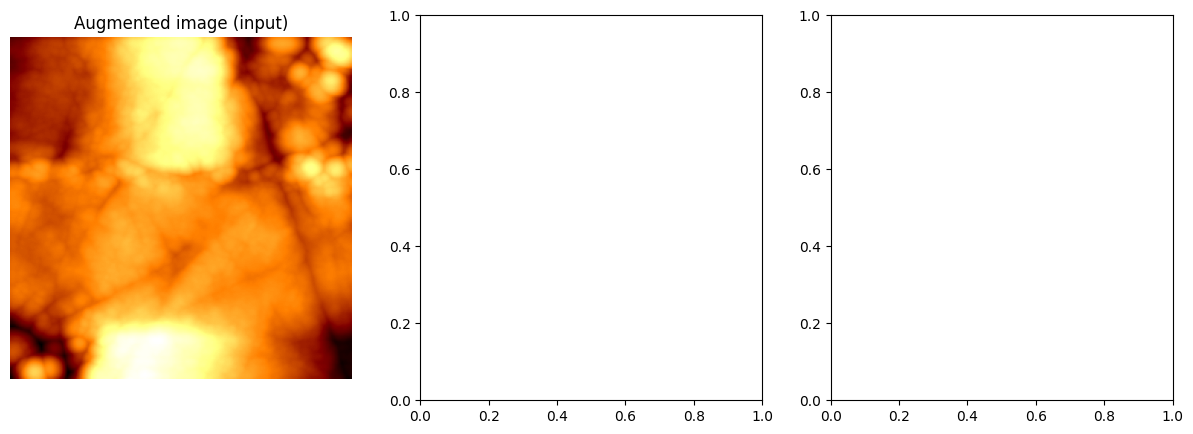

In [ ]:
for i, (inputs, labels) in enumerate(data_loaders_test):
  if i == 0:
    image = inputs[0]
    print(image.shape)
    # Choose an image from the test dataset
    test_image = image.unsqueeze(0).to(device)

    # Pass the image through the autoencoder
    with torch.no_grad():
        reconstructed_image = pretrained_autoencoder(test_image)

    # Create a figure with 3 subplots horizontally
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    img1 = test_image[0,0,:,:].cpu().numpy()
    img2 = np.sum(image.cpu().numpy(), axis=0)
    img3 = reconstructed_image.cpu().numpy()[0,0,:,:]

    # Display the first image
    axes[0].imshow(img1, cmap='afmhot')
    axes[0].axis('off')  # Hide axes
    axes[0].set_title('Augmented image (input)')

    # Display the second image
    axes[1].imshow(img2 , cmap='afmhot')
    axes[1].axis('off')
    axes[1].set_title('Original image')

    # Display the third image
    axes[2].imshow(img3, cmap='afmhot')
    axes[2].axis('off')
    axes[2].set_title('Reconstructed image')

    # Adjust layout
    plt.tight_layout()

    # Show the plot
    plt.show()

torch.Size([3, 224, 224])


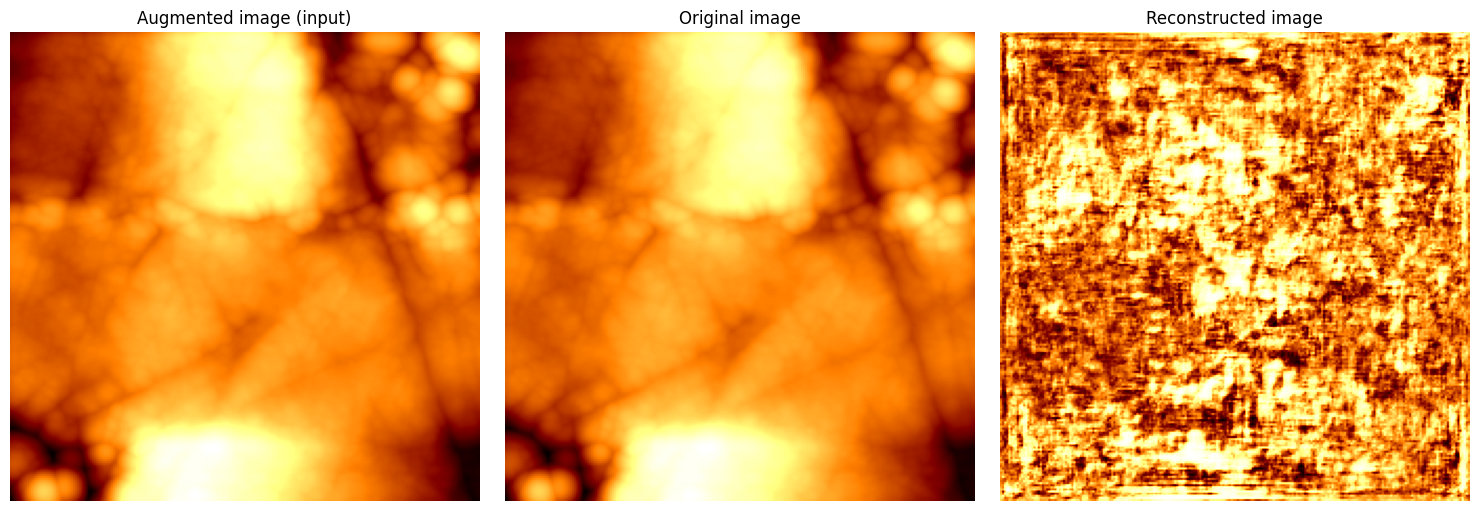

In [ ]:
image = inputs[0]
print(image.shape)
# Choose an image from the test dataset
test_image = image.unsqueeze(0).to(device)

# Pass the image through the autoencoder
with torch.no_grad():
    reconstructed_image = pretrained_autoencoder(test_image)

# Create a figure with 3 subplots horizontally
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

img1 = test_image[0,0,:,:].cpu().numpy()
img2 = np.sum(image.cpu().numpy(), axis=0)
img3 = reconstructed_image.cpu().numpy()[0,0,:,:]

# Display the first image
axes[0].imshow(img1, cmap='afmhot')
axes[0].axis('off')  # Hide axes
axes[0].set_title('Augmented image (input)')

# Display the second image
axes[1].imshow(img2 , cmap='afmhot')
axes[1].axis('off')
axes[1].set_title('Original image')

# Display the third image
axes[2].imshow(img3, cmap='afmhot')
axes[2].axis('off')
axes[2].set_title('Reconstructed image')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()